# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 28 (Thursday) 11:00 pm </font>  

<font color="blue"> Mayuri Kingre </font>

# I. Overview

The objective of this assignment is to study neural networks and its different implementations. Neural network is a multi-layer perceptron. Here, we have implemented non-linear Neural Net and Neural Net with Logistic Regression model for classification data. I have reused datasets from previous assignments of classification and regression. Using k-fold cross validation, we choose the best combination of data for training the final models.

In [893]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import IPython.display as ipd
from copy import deepcopy as copy 
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# II. Data
## Regression (For Neural Net)


In this dataset there are 96,454 (rows) entries against 12 attributes (columns). The main focus is to predict the daily weather based on certain characteristics. This data spans for weather details from 2006 - 2016 (10 years) in Szeged, a city in Hungary. Weather prediction is a science of analysing many details like humidity, wind speed, precip type,etc and then predicting everyday, every hour's weather conditions. Regression analysis will involve finding this relation between humidity and temperature along with other attributes, and to eventually try predicting the apparent temperature. <br>
Weather in Szeged (Hungary)  <br>
   Source: Kaggle <br>
   https://www.kaggle.com/budincsevity/szeged-weather


| Column | Data Type |
| ----| ----|
| Formatted Date   | Date |
| Summary   | String |
| Precip Type   | String |
| Temperature (C)   | Numeric |
| Apparent Temperature (C)   | Numeric |
| Humidity   | Numeric |
| Wind Speed (km/h)   | Numeric |
| Wind Bearing (degrees)   | Numeric |
| Visibility (km) | Numeric |
| Cloud Cover | Numeric |
| Pressure (millibars) | Numeric |
| Daily Summary | String |

In [894]:
df = pd.read_csv("weatherHistory.csv")
print(df.shape)
df.head()

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Preprocessing

The Formatted date column contains date in the form of YYYY-MM-DD HH:MM:SS +Z. Such precision is unnecessary for a vast database visualization. Hence, hereafter only the year and month of each entry will be accounted for. The method __year_month_conv__ is used for manipulating the string and converting it to YYYYMM numeric format.

We are also obtaining dummy values for categorical data such as __Summary__, __Precip Type__ and __Daily Summer__. Since as string data they won't be able to contribute for regression analysis.

In [895]:
def year_month_conv(s):
    s = s[:7]
    if '-' in s:
        s = s[:4] + s[5:7]
    return s               

df['Formatted Date'] = df['Formatted Date'].apply(lambda x: year_month_conv(x))
df['Summary'] = pd.get_dummies(df['Summary'])
df['Precip Type'] = pd.get_dummies(df['Precip Type'])
df['Daily Summary'] = pd.get_dummies(df['Daily Summary'])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,200604,0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0
1,200604,0,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0
2,200604,0,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0
3,200604,0,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0
4,200604,0,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0


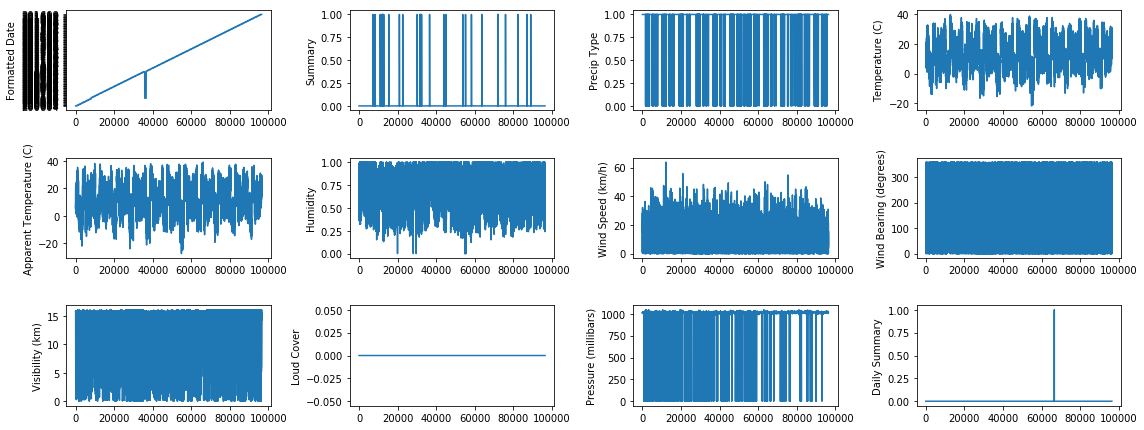

In [896]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(6, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()

### Observations
1. Observation of temperature in Celsius sports of entries in the range of 40 to -20 degrees. Temperature has been recorded slightly more above 0 degrees overall

2. Apparent temperature looks similar to temperature observations as well

3. Humidity falls mostly under 1.00 to 0.25 values

4. Most common wind speed has been observed between 0 to 40 km / hr

5. Similar to wind bearings observations, visibility also is predicted to fall uniformly between 0 to 15 km

6. Pressure ranges from 0 to 1000 millibars in the first 80% of the entries. Afterwards it mostly sticks with 1000 millibars

7. Summary comments with entries between 0 125 were more frequently used than others

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD55884748>,
      dtype=object)

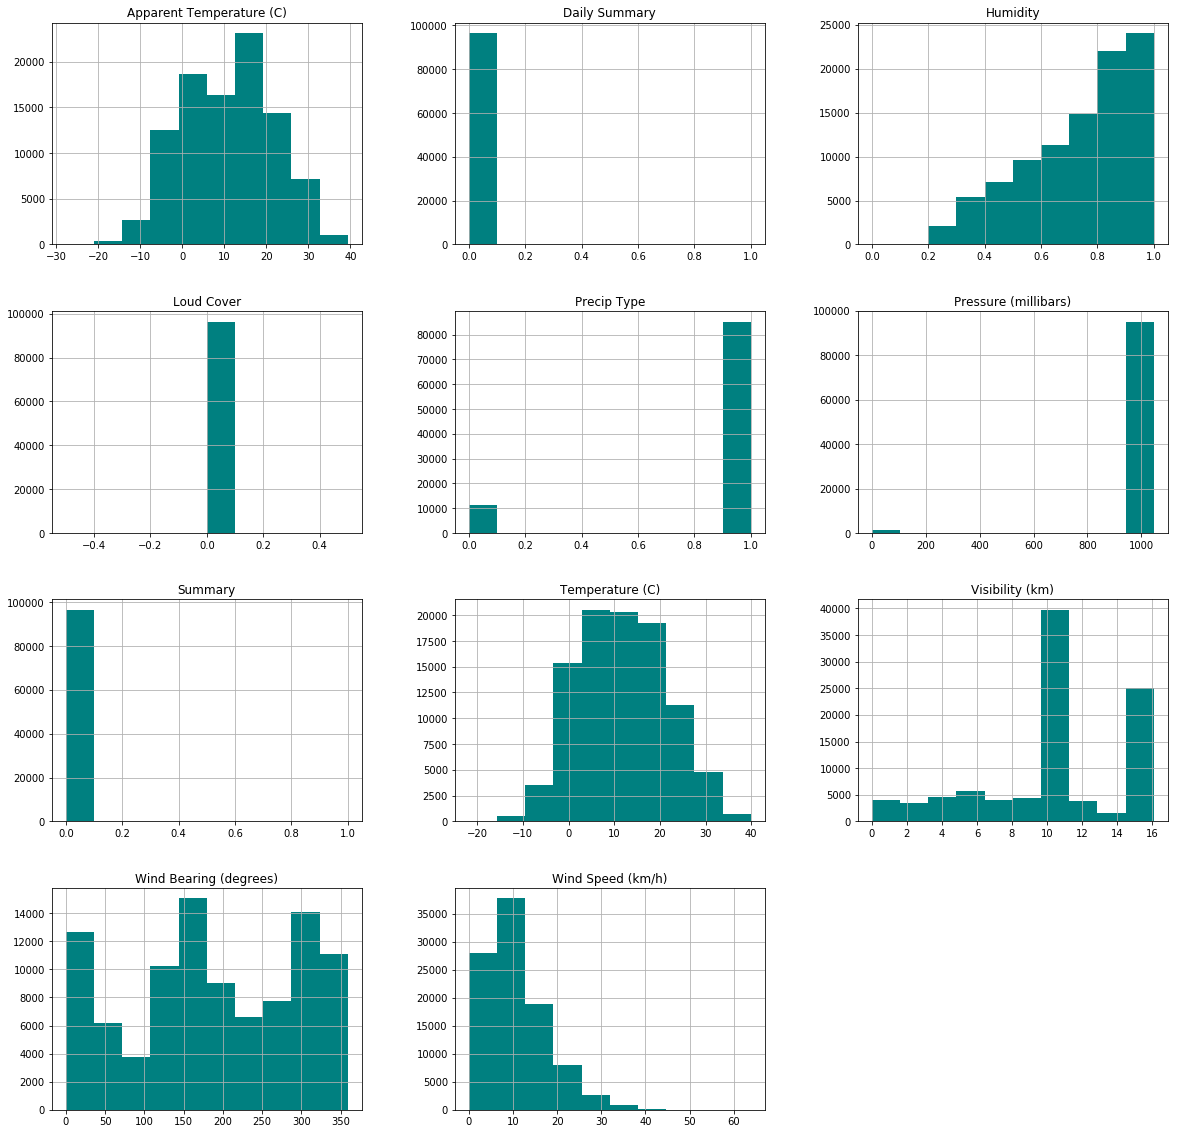

In [897]:
df.hist(figsize=(20,20), color='teal')

Certain features like __Daily Summary__, __Summary__ and __Loud Cover__, do not seem to have values relevant for regression analysis. Let us go ahead and drop these columns

In [898]:
df = df.drop(['Daily Summary', 'Summary','Loud Cover'], axis=1)
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,0.320729,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Some columns seem to have zero or missing values. Let us replace them with medians

In [899]:
def stabilize_min(median, x):
    if x==0:
        x = x + median
    return x

In [900]:
pressure_median = df['Pressure (millibars)'].median()
humidity_median = df['Humidity'].median()
wind_speed_median = df['Wind Speed (km/h)'].median()
wind_bearings_median = df['Wind Bearing (degrees)'].median()
visibility_median = df['Visibility (km)'].median()


df["Pressure (millibars)"] = df.apply(lambda row:stabilize_min(pressure_median, row["Pressure (millibars)"]) , axis = 1)
df["Humidity"] = df.apply(lambda row:stabilize_min(humidity_median, row["Humidity"]) , axis = 1)
df["Wind Speed (km/h)"] = df.apply(lambda row:stabilize_min(wind_speed_median, row["Wind Speed (km/h)"]) , axis = 1)
df["Wind Bearing (degrees)"] = df.apply(lambda row:stabilize_min(wind_bearings_median, row["Wind Bearing (degrees)"]) , axis = 1)
df["Visibility (km)"] = df.apply(lambda row:stabilize_min(visibility_median, row["Visibility (km)"]) , axis = 1)

In [901]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,11.932678,10.855029,0.735077,10.944651,191.734295,10.394196,1016.809278
std,0.320729,9.551546,10.696847,0.195158,6.798348,103.389436,4.131900,7.726359
min,0.000000,-21.822222,-27.716667,0.120000,0.032200,1.000000,0.016100,973.780000
25%,1.000000,4.688889,2.311111,0.600000,6.118000,128.000000,8.468600,1012.200000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD661DBD68>,
      dtype=object)

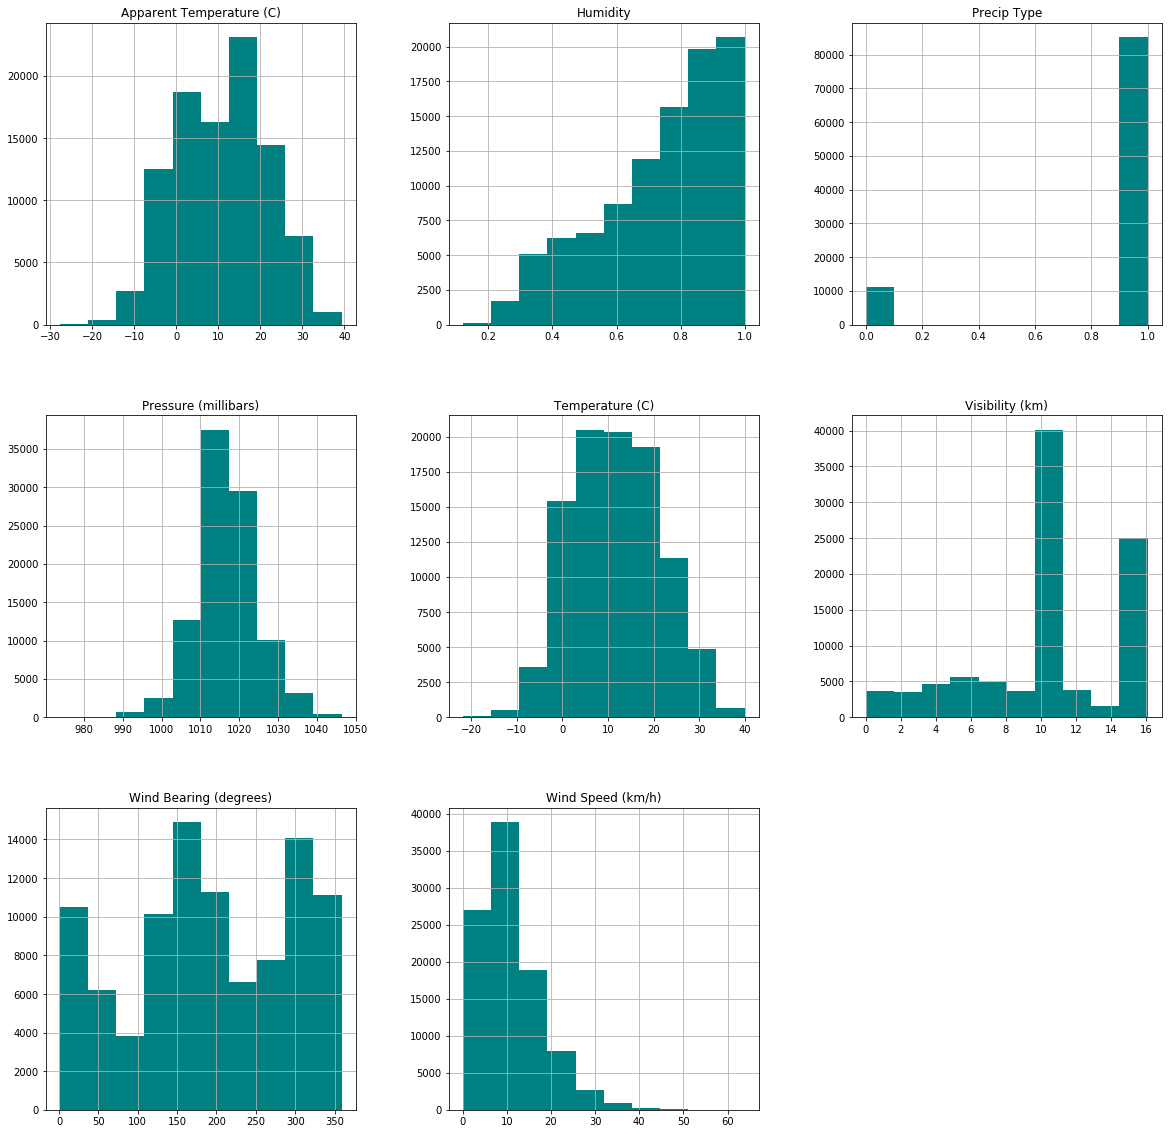

In [902]:
df.hist(figsize=(20,20), color='teal')

### Observation
Wind bearing is uniformly distributed between 0 to 360 degrees for the given span of ten years <br>

Visibility charts are more sharp here, we can see that 10-12 kms is the most frequent visibility distance recorded. 

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,0.553873,0.555889,-0.231064,0.063982,0.038929,0.307787,-0.295888
Temperature (C),0.553873,1.000000,0.992629,-0.635706,0.006619,0.026291,0.391215,-0.308120
Apparent Temperature (C),0.555889,0.992629,1.000000,-0.605969,-0.057844,0.027670,0.379989,-0.286078
Humidity,-0.231064,-0.635706,-0.605969,1.000000,-0.217611,0.013623,-0.372198,0.040455
Wind Speed (km/h),0.063982,0.006619,-0.057844,-0.217611,1.000000,0.071963,0.100828,-0.247393
Wind Bearing (degrees),0.038929,0.026291,0.027670,0.013623,0.071963,1.000000,0.046622,-0.067459
Visibility (km),0.307787,0.391215,0.379989,-0.372198,0.100828,0.046622,1.000000,-0.159376
Pressure (millibars),-0.295888,-0.308120,-0.286078,0.040455,-0.247393,-0.067459,-0.159376,1.000000


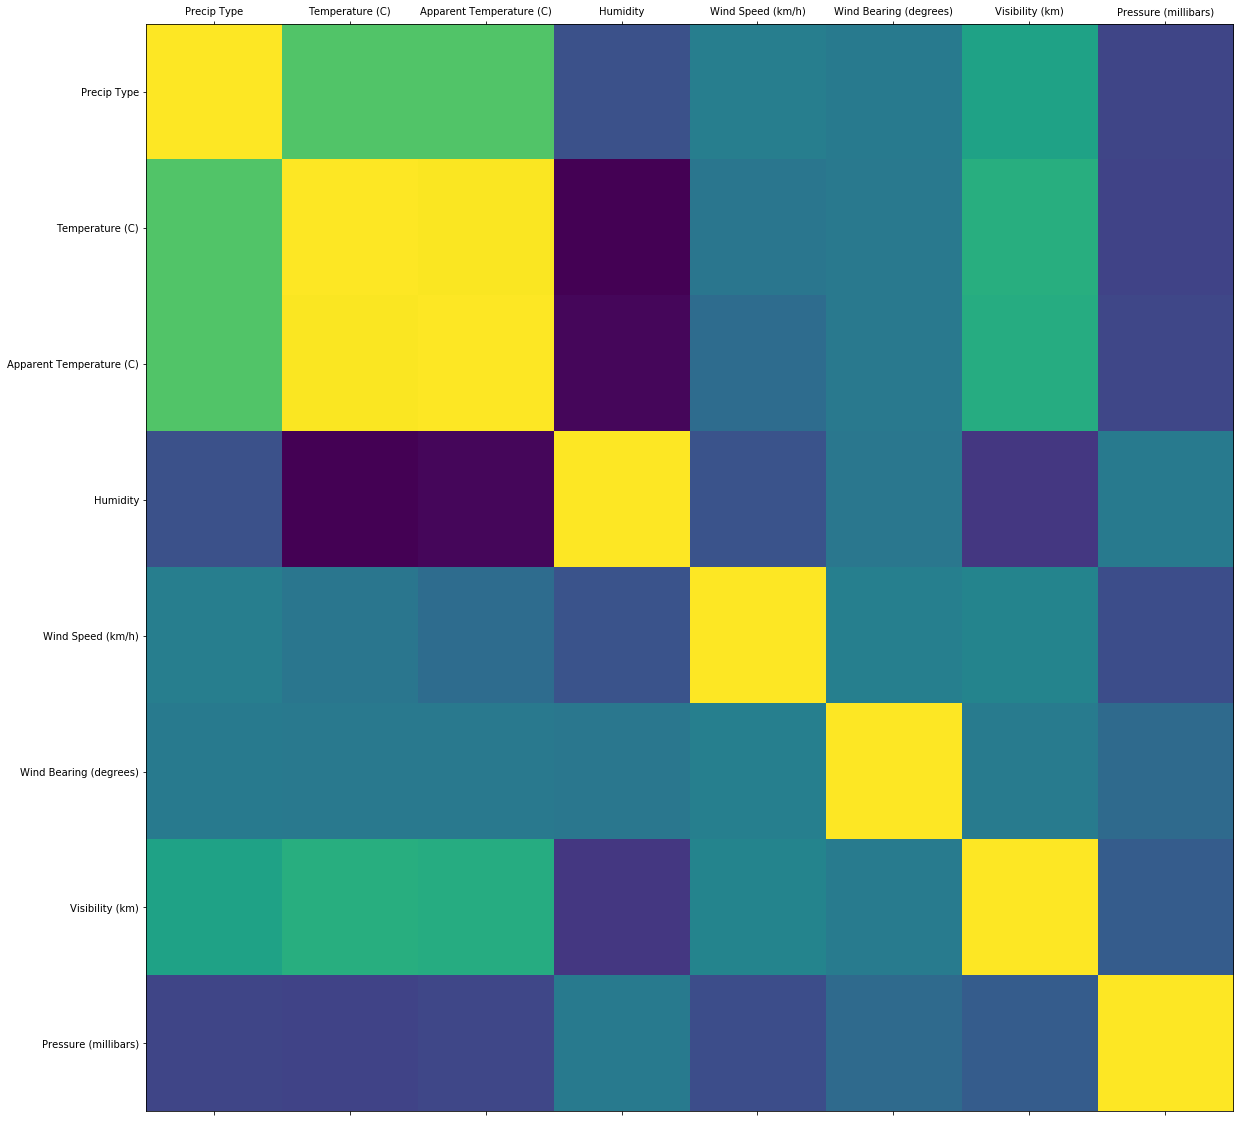

In [903]:
size=20
correlation = df.corr()
correlation.style.background_gradient().set_precision(2)
correlation.style.format("{:.2%}")

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(correlation,interpolation="nearest")

plt.xticks(range(len(correlation.columns)), correlation.columns);
plt.yticks(range(len(correlation.columns)), correlation.columns);

correlation

Apparent Temperature is our target feature. The correlation graph suggests that Temperatre and Apparent temperature have high relation, So does wind speed and wind bearings. Let us use all these features to predict the apparent temperature.

In [904]:
df.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,200604,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,200604,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,200604,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,200604,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,200604,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [905]:
T = df.iloc[:, 3]
T = np.asarray(T).reshape((T.shape[0],1))
print(T.shape)

(96453, 1)


Let us pick rest of the database for feature based regression, by dropping target column from it, to avoid unbiased predictions.

In [906]:
X = df.drop(['Apparent Temperature (C)'], axis=1)
N = X.shape[0]
print(X.shape)
X.head()

(96453, 8)


,Formatted Date,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,200604,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,200604,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,200604,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,200604,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,200604,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [907]:
X['Formatted Date'] = X['Formatted Date'].astype('float64')
X['Precip Type'] = X['Precip Type'].astype('float64')

## Classification Data (For NeuralNetLogReg)

This dataset is obtained from Kaggle. It is titled as 'Rain in Australia'. We are provided with multiple features such as city, temperature levels, rainfall measure, evaporation, sunshine, wind directions and speeds, etc from 2008 to 2017. In this dataset, there are around 142194 rows (data samples) and 2 columns (features). The objective or target feature in this dataset is prediction of tomorrow's rain. Hence, this is an ideal dataset for practicing binary classification, where the answer is either 1 (it will rain) or -1 (it will not rain). <br>
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

| Column | Data Type |
| ----| ----|
| Date   | Date |
| Location   | String |
| MinTemp   | Numeric |
| MaxTemp   | Numeric |
| Rainfall   | Numeric |
| Evaporation   | Numeric |
| Sunshine   | Numeric |
| WindGustDir   | String |
| WindGustSpeed   | Numeric |
| WindDir9am   | String |
| WindDir3pm   | String |
| WindSpeed9am   | Numeric |
| WindSpeed3pm   | Numeric |
| Humidity9am   | Numeric |
| Humidity3pm   | Numeric |
| Pressure9am   | Numeric |
| Pressure3pm   | Numeric |
| Cloud9am | Numeric |
| Cloud3pm | Numeric |
| Temp9am | Numeric |
| Temp3pm | Numeric |
| RainToday | String |
| RISK_MM | Numeric |
| RainTomorrow | String |

In [908]:
class_df = pd.read_csv('weatherAUS.csv')
class_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [909]:
class_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [910]:
class_df = class_df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date','WindGustDir','WindDir3pm','WindDir9am'],axis=1)
class_df = class_df.dropna(how='any')

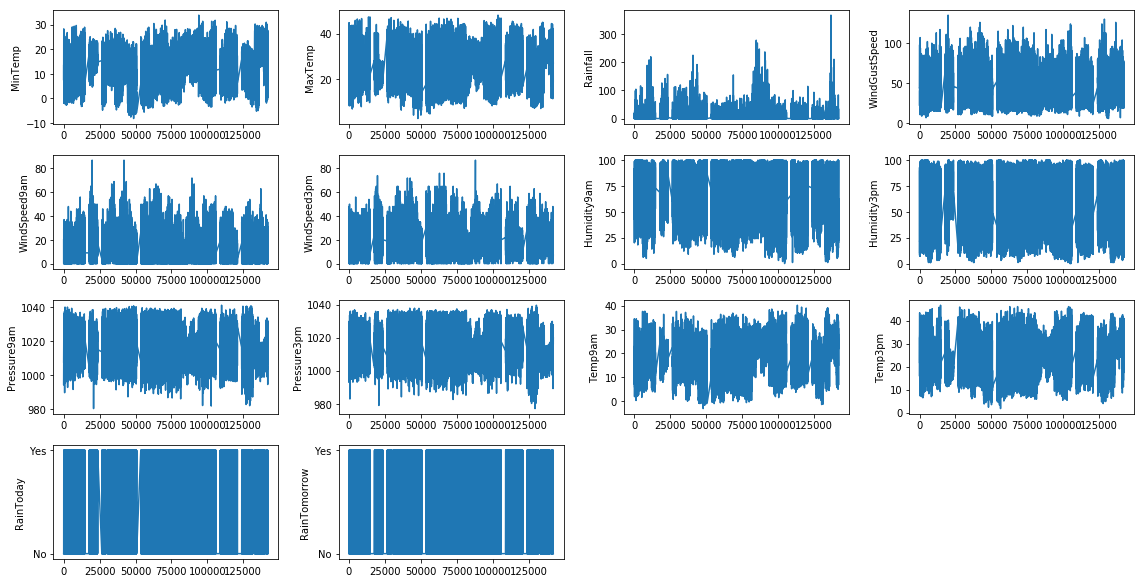

In [911]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(14):
    plt.subplot(6, 4, i+1)
    plt.plot(class_df.iloc[:, i])
    plt.ylabel(class_df.columns.values[i])
fig.tight_layout()

### Preliminary Observation
Almost all features have densely distributed values within the range of their data. Rain Tomorrow has around 100,000 positive result. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD6C5BC5C0>,
      dtype=object)

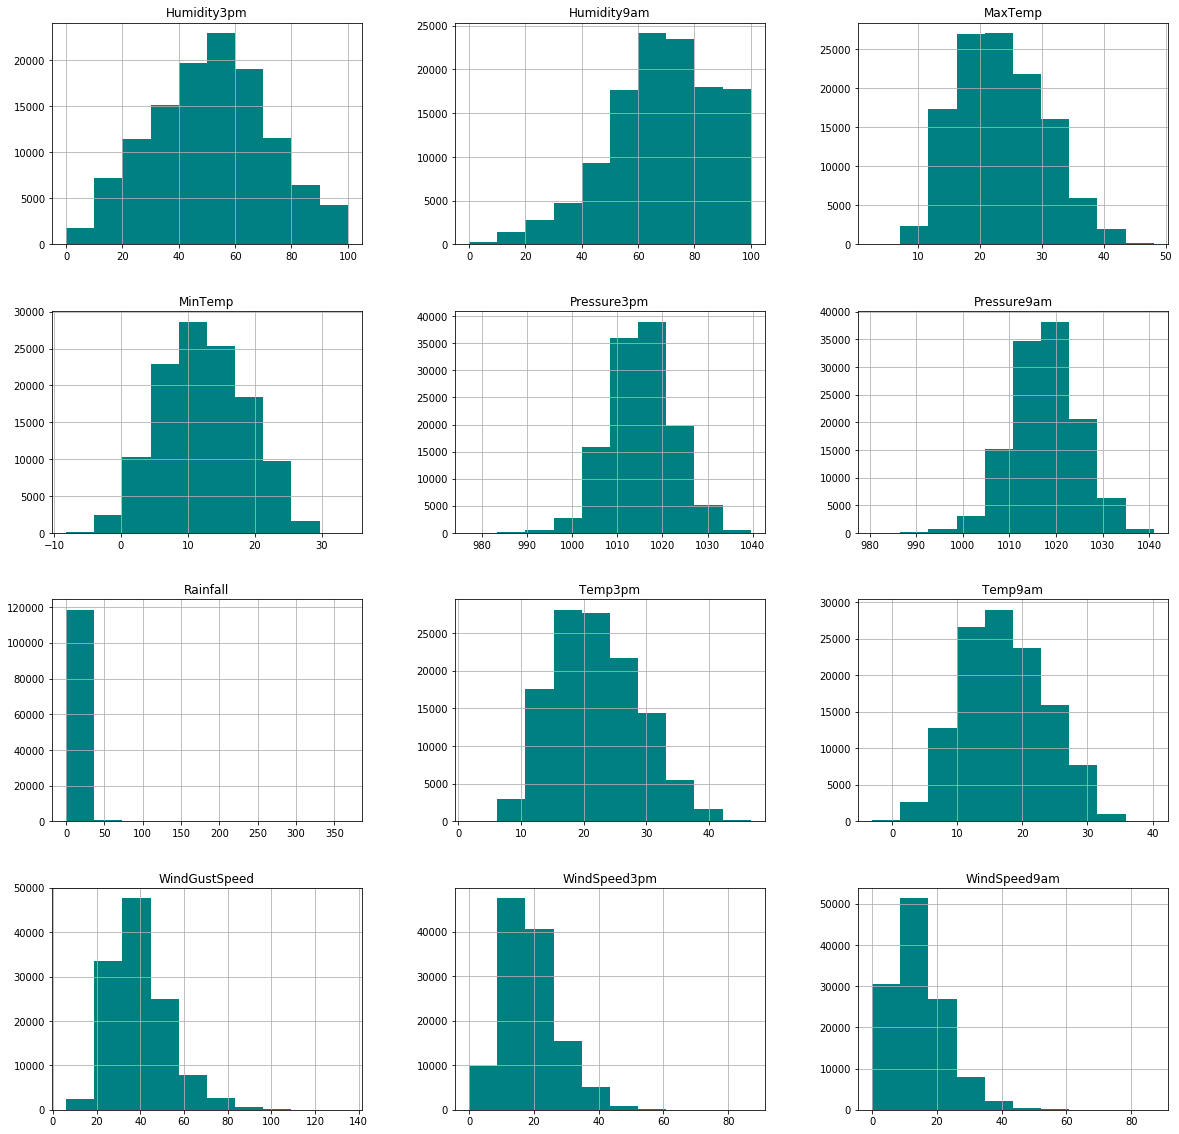

In [912]:
class_df.hist(figsize=(20,20), color='teal')

### Preliminary Observation

1. Humidity at 3pm is between range of 0 to 100 and has value of 50 for maximum entries.
2. Humidity at 9pm is between range of 0 to 100 and has value of 70 for maximum entries. 
3. Maximum temperature recorded ranges from 5 to 45 degrees, 20 degrees is the most recorded highest temperature.
4. Minimum temperature recorded ranges from 0 to 30 degrees, 10 degrees is the most recorded highest temperature.
5. Pressure at 3 pm is between range of 1000 to 1030 and maximum is recorded from 1010 to 1020.
6. Pressure at 9 am is between range of 1000 to 1040 and maximum is recorded from 1010 to 1020.
7. More than 80000 entries suggest that it rained on that day.
8. Around 80000 entries suggest that it will rain on the next day.
9. Rainfall mostly recorded has been between 0-5
10. Wind gust speed recorded is between range of 0 to 80 and maximum is recorded at 30.

In [913]:
z_score = np.abs(stats.zscore(class_df._get_numeric_data()))
class_df= class_df[(z_score < 3).all(axis=1)]

binary_dict = {'Yes': 1, 'No':0}
class_df['RainToday'] = class_df['RainToday'].apply(lambda x: binary_dict[x])
class_df['RainTomorrow'] = class_df['RainTomorrow'].apply(lambda x: binary_dict[x])

class_df['RainToday'] = class_df['RainToday'].astype('float64')
class_df['RainTomorrow'] = class_df['RainTomorrow'].astype('float64')

# III. Methods

## III.A 5-fold Cross Validation

Cross Validation is a practice of choosing the best partition of the dataset for training the model. This helps in comparing different machine learning models and determining their performances. K-fold Cross Validation is the most popular implementation because it is easy to understand and generally provides an unbiased result. <br> In a K-fold Cross Validation, <br>
- Dataset is divided in K partitions
- Each part is held out as test data one by one
- Remaining parts are each held out as validation data, again one by one
- Remaining n - 2 parts are joined together to be used as training data
- The model is trained with various parameters and/or layers repeatedly
- The output is judged based on any performance metric (error rate, accuracy, etc)
- We add the performance metric results and the corresponding layer and parameters combination in two lists
- Best layer combination is picked based in best performance metric results
- Then we try out this layer combination on validation data
- All the validation results are stored and the best one is used on test data
- Based on the list of test data's results, we pick the best model and return its results 
<br><br>
Find best is a generic function used for both nonlinear regression and nonlinear logistic regression. Based on the type of performance metric used it will either pick out the result with least error or the one with highest accuracy.

## III.B Nonlinear Regression 

In a Neural Network, we stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. each neuron has a threshold and filters out unnecessary or redundant data from passing to further layers. It uses forward and backward propagation. Forward propagation is used to obtain the predictions, whereas backward propagation is used to update the weights. There are multiple hidden layers, and each have an activation function.<br>
### Code Explanation 
<br>
- <b>Standardizer</b> : This class is used for proportioning the data set values within the range of 0 to 1, for unbiased training of model. <br>
- <b>init</b> : In NeuralNet class, init function initializes the model based on number of hidden layers. Hidden layers are added to wdims and W is reshaped according to hidden layers. <br>
- <b>add_ones</b> : Adds the bias value for data <br>
- <b>pack / unpack</b> : This function folds / unfolds multiple weights of each layer into/from a vector<br>
- <b>forward</b> : uses weights to calculate results, and also applies activation function to data<br>
- <b>backward</b> : updates the weights to rectify learning of the model<br>
- <b>train</b> : uses either scg or steepest optim along with other hyperparameters like learning rate, precision, etc to train the model<br>
- <b>use</b> : this function uses standardizer and then forward pass to predict the results 





## III.C Nonlinear Logistic Regression

Nonlinear Logistic regression uses neural network to classify data in discrete number of outputs. It uses softmax function for getting the output. Indicator matrix is a matrix denoting probability of each class. This matrix is used for multi-label data and for training by updating the weights of model. We also make use of negative log likelihood to derive the gradient. Following assignment makes use of Neural Net as super class, and overrides certain methods like <b>init</b>, <b>forward</b>, <b>objectf</b>, <b>train</b> and <b> use</b>.
<br>
### Code Explanation:
- <b>forward</b> : Implements forward method of super class and applies softmax function to it before returning the values
- <b>objectf</b> : Makes use of negative log likelihood to minimize the error of model
- <b>train</b> : converts the target data into indicator matrix and then calls train method of super class
- <b>use</b> : this method makes use of neural net's use method and returns two things. The class with highest probability from indicator matrix by argmax function and probabilities of all classes

In [914]:

def find_best(res, accuracy=False):
    best_error = res[0][1]
    hidden_layers = res[0][0]
    prediction = res[0][2]
    test_set = res[0][3]
    if accuracy:
        for r in res:
            if r[1]> best_error:
                best_error = r[1]
                param = r[0]
                prediction = r[2]
                test_set = r[3]
    else:
        for r in res:
            if r[1]< best_error:
                best_error = r[1]
                param = r[0]
                prediction = r[2]
                test_set = r[3]
    return [hidden_layers, best_error, test_set, prediction]

In [915]:
def crossValidation(X, T, K, parameters, model, accuracy_model):
    nfold = 0
    res =[]
    param = []
    testErrs = []
    totalRows = X.shape[0]
    
    X_sets = np.array_split(X, K)
    T_sets = np.array_split(T, K)
        
    for test_no in range(K):
        for validation_no in [i for i in range(K) if i!=test_no]:
            
            X_train = np.concatenate([X_sets[i] for i in range(K) if i!=validation_no and i!=test_no])
            T_train = np.concatenate([T_sets[i] for i in range(K) if i!=validation_no and i!=test_no])
            
            for parameter in parameters:
                current_model = model(parameter)
                current_model.train(X_train, T_train, ftracep = True)
                prediction = current_model.use(X_sets[validation_no])
                error = accuracy_model(prediction, T_sets[validation_no])
                res.append(error)
                param.append(parameter)
        if accuracy_model == 'accuracy':
            best_res =max(res)
        else:
            best_res =min(res)
        
        bestValidation = res.index(best_res)
        bestModel = model(param[bestValidation])
        X_train = np.concatenate([X_sets[i] for i in range(K) if i!=bestValidation and i!=test_no])
        T_train = np.concatenate([T_sets[i] for i in range(K) if i!=bestValidation and i!=test_no])
        bestModel.train(X_train,T_train, ftracep = True)
        testPrediction = bestModel.use(X_sets[test_no])
        t_error = accuracy_model(testPrediction, T_sets[test_no])
        
        testErrs.append([param[bestValidation], t_error, testPrediction, test_no])
    if accuracy_model == 'accuracy':
        best_prediction = find_best(testErrs, accuracy=True)
    else:
        best_prediction = find_best(testErrs)
    return best_prediction


In [916]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        super().__init__(nunits)
        self.stdTarget = False

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t, Z = NeuralNet.forward(self, X)
        t = np.exp(t) / np.sum(np.exp(t), axis=1, keepdims=True)
        return t, Z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
         return -np.sum(T*np.log(Y)) + wpenalty
        
    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        
        if(len(T.shape) > 1): 
            if(T.shape[1] > 1):
                return NeuralNet.train(self, X, T, **params)
            T = T.flatten() 
        uniqueItems = np.unique(T) 
        indicator_T = (T[:,None] == uniqueItems).astype(int)         
        return NeuralNet.train(self, X, indicator_T, **params)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):

        Y = NeuralNet.use(self,X)
        return np.argmax(Y,1),Y


In [917]:
from sklearn.metrics import accuracy_score

def rmse(Y, T):    
    return np.sqrt(np.sum((T-Y)**2))

def accuracy(Y,T):    
    return accuracy_score(T, Y[0])

### Implementation of Nonlinear Regression (Neural Net) with regression dataset
We are making use of three combinations of hidden layers. With use of 5 - fold cross validation, th best set of training data and hidden layers is determined.

| Hidden Layers |
| ----|
| [8,1]   |
| [8,2,1]   |
| [8,4,2,1]   |

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

### Presentation of CV results and plots for results:

The best error is  65.48781171677805


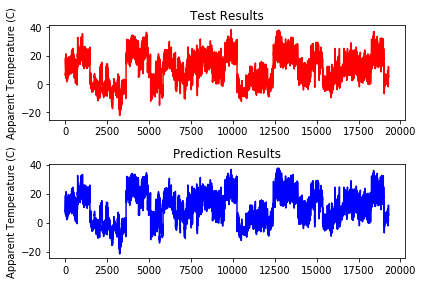

In [919]:
hidden_layers = [[8,1], [8,2,1], [8,4,2,1]]
result = crossValidation(X,T,5,hidden_layers, NeuralNet, rmse)
T_sets = np.array_split(T, 5)

plt.subplot(2, 1, 1)
plt.title('Test Results')
plt.ylabel('Apparent Temperature (C)')
plt.plot(T_sets[result[2]], 'r-')
plt.subplot(2, 1, 2)
plt.title('Prediction Results')
plt.ylabel('Apparent Temperature (C)')
plt.tight_layout()
plt.plot(result[3], 'b-')
print('The best error is ', result[1])

In [984]:
print('The best hidden layers are ', result[0])
print('The best test set is ', result[2])
print('Indicator / probability matrix : ')
print(result[3])

The best hidden layers are  [8, 2, 1]
The best test set is  3
Indicator / probability matrix : 
[[10.46946047]
 [10.52654941]
 [10.62600368]
 ...
 [10.37915971]
 [10.37854064]
 [10.38711571]]


### Presentation of CV results:
Using 5-fold CV we can see that hidden layers combination of [8, 2, 1] gives the least error of 65 among all other errors.

## Classification

In [920]:
class_T=class_df['RainTomorrow']
class_X = class_df.drop(columns=['RainTomorrow'],axis=1)

### Examination of correct implementation (NonlinearLogReg) with toy data

- Sample X data consists of 3 rows and two columns. Sample T (target) data consists of three rows. 
- This is a classification toy data, with binary class labels. 
- We initialize the NeuralNetLogReg class with hidden layers. The first parameter is the number of features and the last layer is the number of possible labels for each data. 
- We train the model using this sample X and T. 
- Now this model is used to predict target. 
- Result: 
- As seen from the plot, both the target test and prediction data are the same with 100% accuracy.

c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


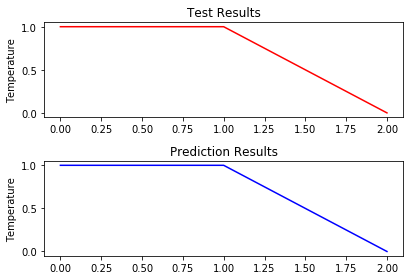

In [921]:
sample_X = np.array([0,1,1,0,1,1]).reshape(3,2)
sample_T = np.array([1,1,0])

nnLogReg = NeuralNetLogReg([2,3,2])
nnLogReg.train(sample_X, sample_T) 
sample_Y = nnLogReg.use(sample_X)

plt.subplot(2, 1, 1)
plt.title('Test Results')
plt.ylabel('Temperature')
plt.plot(sample_T, 'r-')
plt.subplot(2, 1, 2)
plt.title('Prediction Results')
plt.ylabel('Temperature')
plt.tight_layout()
plt.plot(sample_Y[0], 'b-')

### Implementation of Nonlinear Logistic Regression with classification dataset

We are making use of three combinations of hidden layers. With use of 5 - fold cross validation, th best set of training data and hidden layers is determined.

| Hidden Layers |
| ----|
| [13,2]   |
| [13,4,2]   |
| [13,6,3,2]   |

In [922]:
class_T = np.asarray(class_T).reshape((class_T.shape[0],1))
hidden_layers = [[13,2],[13,4,2],[13,6,3,2]]

res = crossValidation(class_X,class_T,5,hidden_layers, NeuralNetLogReg, accuracy)

c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
c:\users\mayuri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


### Presentation of CV results and plots for results:

Best Accuracy is  84.0  %


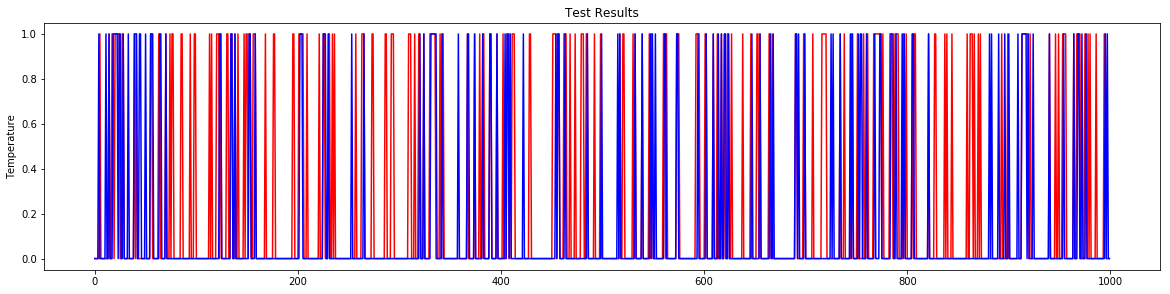

In [923]:
T_sets = np.array_split(class_T, 5)

plt.figure(figsize=[20,10])
plt.subplot(2, 1, 1)
plt.title('Test Results')
plt.ylabel('Temperature')
plt.plot(T_sets[res[2]][:1000], 'r-')

plt.plot(res[3][0][:1000], 'b-')

print('Best Accuracy is ', round(res[1] * 100), ' %')

In [986]:
print('The best hidden layers are ', res[0])
print('The best test set is ', res[2])
print('Indicator / probability matrix : ')
print(res[3][1])

The best hidden layers are  [13, 2]
The best test set is  1
Indicator / probability matrix : 
[[0.84557186 0.15442814]
 [0.85305499 0.14694501]
 [0.88210965 0.11789035]
 ...
 [0.86403697 0.13596303]
 [0.72638203 0.27361797]
 [0.87968749 0.12031251]]


### Presentation of CV results:
Using 5-fold CV we can see that hidden layers combination of [13, 2] gives the best accuracy of 84 %.

### Discussions about parameter/network structure choice
#### Non Linear Regression
By making use of hidden layers [8, 2, 1] we minimize the error rate. This is the best model picked out by cross validation. Error is calculated with help of an RMSE method. Among the existing combination of hidden layers [8, 2, 1] produced best results.


#### Non Linear Logistic Regression

The hidden layers [13, 2] have obtained an accuracy of 84% for classification data during the non linear logistic regression. The accuracy was determined using accuracy_score of sklearn.


### Discussion about the prediction results 
Because of backward propagation, the weights of the model were periodically updated for better prediction in future layers. With the help of an activation function we could regulate the data passed on by forward pass. Indicator matrix enabled us understand the probability of all the classes. This is useful to our interpretation and we chose the one with highest probability by default.

# Conclusions

- Understanding the differences between nonlinear regression and nonlinear logistic regression, I found that with a few modifications to neural net model like using a softmax function during forward pass, indicator matrix while training the model and log likelihood for error minimization, we can implement neural net for classification data.
- Practical implementation of k - fold cross validation, helped me in better understanding it, which wouldn't have been possible if I would have used existing libraries. I was able to generalize the method for both the models and their respectively different performance metric functionalities (RMSE and accuracy_score) for assessing the best models.


# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


### Activation Functions:
1. <b><i>tanh</i></b> (already implemented)
2. <b>ReLU</b> - Rectified Linear Units involves simpler mathematical calculations and gives better performance than a sigmoid function
3. <b>Leaky ReLU</b> - This is a variant of ReLU, where nan data is allowed to have a negative slope instead of a zero (as is in ReLU)

In [925]:
#ReLU
class NeuralNetSoftmax2(NeuralNet):
    
    def forward(self, X):
        t, Z = NeuralNet.forward(self, X)
        t = np.maximum(t, 0, t)
        return t, Z

In [926]:
#Leaky ReLU
class NeuralNetSoftmax3(NeuralNet):
    
    def forward(self, X):
        t, Z = NeuralNet.forward(self, X)
        t1 = ((t > 0) * t)                                                 
        t2 = ((t <= 0) * t * 0.01)                                         
        t = t1 + t2
        return t, Z

The best error is  985.915855504216


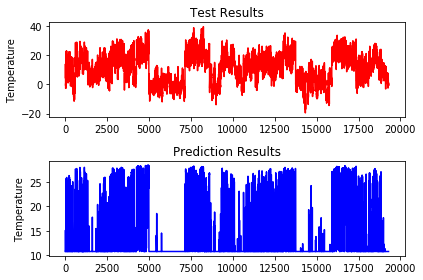

In [927]:
hidden_layers = [[8,1], [8,2,1], [8,4,2,1]]
result = crossValidation(X,T,5,hidden_layers, NeuralNetSoftmax2, rmse)
T_sets = np.array_split(T, 5)

plt.subplot(2, 1, 1)
plt.title('Test Results')
plt.ylabel('Temperature')
plt.plot(T_sets[result[2]], 'r-')
plt.subplot(2, 1, 2)
plt.title('Prediction Results')
plt.ylabel('Temperature')
plt.tight_layout()
plt.plot(result[3], 'b-')
print('The best error is ', result[1])

The best error is  968.5495693772076


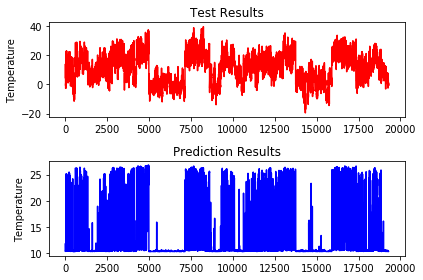

In [928]:
hidden_layers = [[8,1], [8,2,1], [8,4,2,1]]
result = crossValidation(X,T,5,hidden_layers, NeuralNetSoftmax3, rmse)
T_sets = np.array_split(T, 5)

plt.subplot(2, 1, 1)
plt.title('Test Results')
plt.ylabel('Temperature')
plt.plot(T_sets[result[2]], 'r-')
plt.subplot(2, 1, 2)
plt.title('Prediction Results')
plt.ylabel('Temperature')
plt.tight_layout()
plt.plot(result[3], 'b-')
print('The best error is ', result[1])

Based on cross validation results above, we can conclude the following performances:

| Activation Function | Error |
| ----| ----|
| <b><i>tanh</i></b>   | 65.48 |
| <b>ReLU</b>   | 985.91 |
| <b>Leaky ReLU</b>   | 968.54 |

<b><i>tanh</i></b> gives the best results from all three activation functions.

# References

1. Young, Joe. “Rain in Australia.” RSNA Pneumonia Detection Challenge | Kaggle, Joe Young, 3 Dec. 2018, www.kaggle.com/jsphyg/weather-dataset-rattle-package.
2. Budincsevity, Norbert. “Weather in Szeged 2006-2016.” Kaggle, 8 Jan. 2017, www.kaggle.com/budincsevity/szeged-weather
3. Goodfellow, I., Bengio, Y., & Courville, A. (2017). Deep learning. Cambridge, MA: MIT Press. Retrieved from http://www.deeplearningbook.org.
4. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: OReilly Media.
5. Tatman, Rachael. “Datasets for Regression Analysis.” Kaggle, 2018, www.kaggle.com/rtatman/datasets-for-regression-analysis.
6. Brownlee, Jason. “A Gentle Introduction to k-Fold Cross-Validation.” Machine Learning Mastery, 21 May 2018, machinelearningmastery.com/k-fold-cross-validation/.

# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
